In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import layers

In [48]:
# load dataset
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
x_train=train.iloc[:,1:].values
x_test=test.iloc[:,1:].values
y_train=train['label'].values
y_test=test['label'].values
x_train[6,:].shape

(784,)

In [50]:
# Preprocess the data
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0  # Reshape and normalize training images
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0    # Reshape and normalize test images
y_train = keras.utils.to_categorical(y_train, num_classes=10)  # Convert training labels to one-hot encoded vectors
y_test = keras.utils.to_categorical(y_test, num_classes=10)    # Convert test labels to one-hot encoded vectors

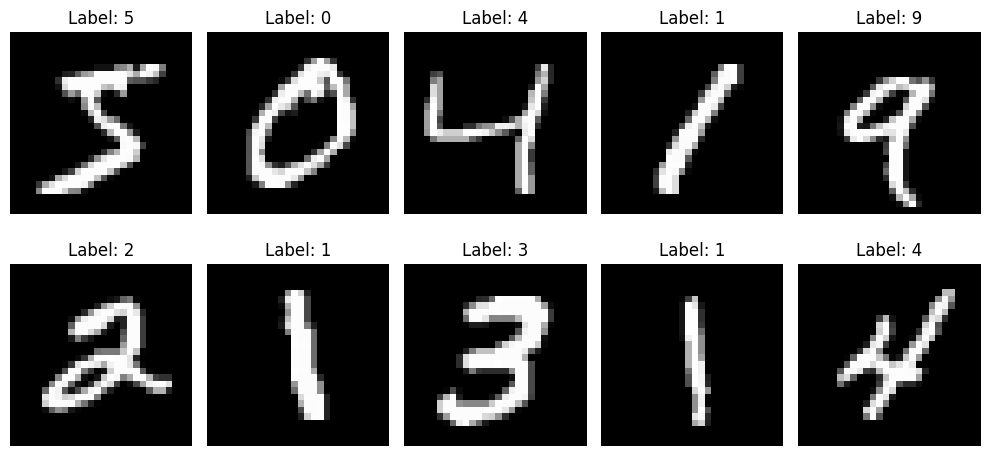

In [51]:
# Visualize sample images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {np.argmax(y_train[i])}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [52]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [53]:

encoding_dim = 32  # This is the size of our encoded representations


input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)

encoder = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input)) # as if i am multiplying the last layer with the code layer to get the last output  of 784



In [54]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [55]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 2s 8ms/step - loss: 0.2754 - val_loss: 0.1896
Epoch 2/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1707 - val_loss: 0.1535
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1440 - val_loss: 0.1335
Epoch 4/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1284 - val_loss: 0.1215
Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1185 - val_loss: 0.1140
Epoch 6/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1119 - val_loss: 0.1080
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1071 - val_loss: 0.1042
Epoch 8/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1034 - val_loss: 0.1007
Epoch 9/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1005 - val_loss: 0.0980
Epoch 10/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0983 - val_loss: 0.0961

In [56]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


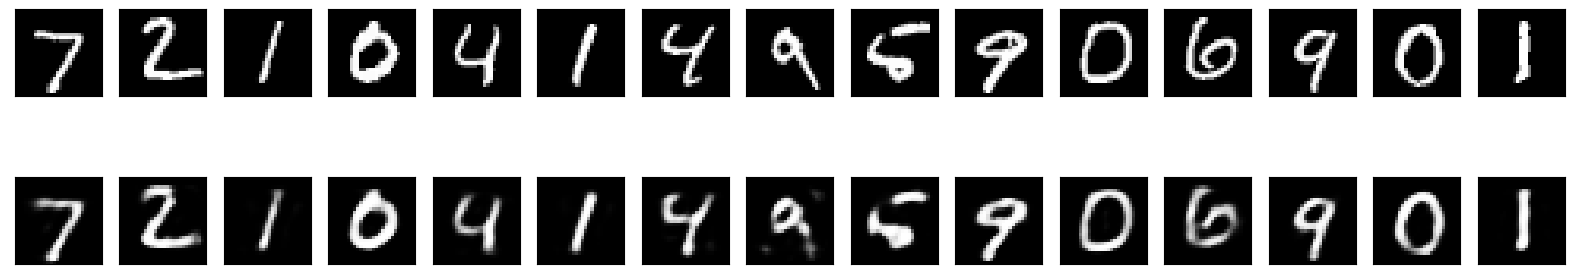

In [57]:
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

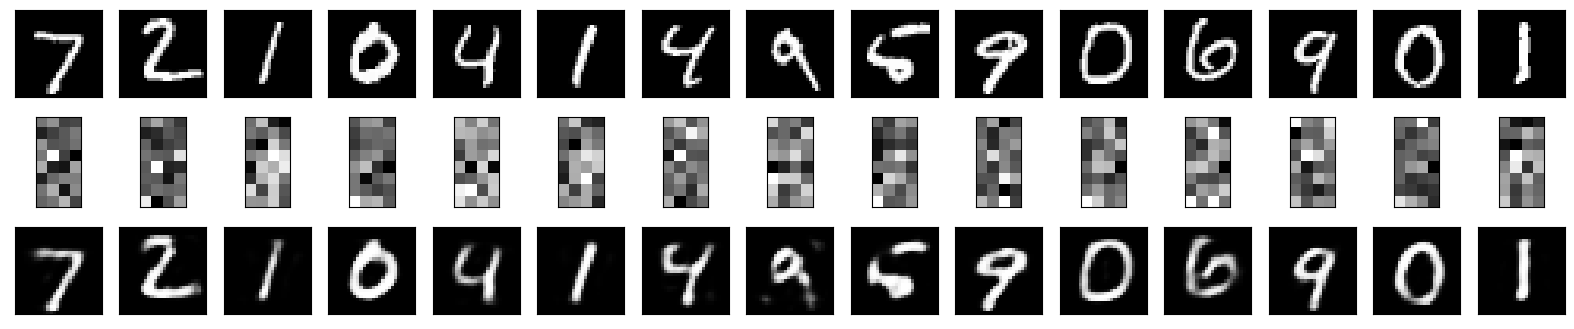

In [58]:
n = 15  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1+n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()